In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys
from tqdm import tqdm
sys.path.append('/home/basil/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata


In [9]:
to_hd = '/media/basil/Elements/data/'
grid_files, grid_filepath = tools.get_data_paths_from_binary(to_hd,'llc270/Grid',file_end='nc')
grid_filepath

['/media/basil/Elements/data/llc270/Grid/GRID.0001.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0002.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0003.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0004.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0005.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0006.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0007.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0008.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0009.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0010.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0011.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0012.nc',
 '/media/basil/Elements/data/llc270/Grid/GRID.0013.nc']

In [10]:
#Davis = 11, Fram = 7
grid_davis = xr.open_dataset(to_hd+'llc270/llc270_grid_test.nc')
grid_270 = xr.open_dataset(grid_filepath[11])
np.array(grid_270['RC'])
#grid_davis['Depth'].plot()

array([-5.00000000e+00, -1.50000000e+01, -2.50000000e+01, -3.50000000e+01,
       -4.50000000e+01, -5.50000000e+01, -6.50000000e+01, -7.50049973e+01,
       -8.50250015e+01, -9.50950012e+01, -1.05309998e+02, -1.15870003e+02,
       -1.27150002e+02, -1.39740005e+02, -1.54470001e+02, -1.72399994e+02,
       -1.94735001e+02, -2.22710007e+02, -2.57470001e+02, -2.99929993e+02,
       -3.50679993e+02, -4.09929993e+02, -4.77470001e+02, -5.52710022e+02,
       -6.34734985e+02, -7.22400024e+02, -8.14469971e+02, -9.09739990e+02,
       -1.00715503e+03, -1.10590503e+03, -1.20553503e+03, -1.30620496e+03,
       -1.40915002e+03, -1.51709497e+03, -1.63417505e+03, -1.76513501e+03,
       -1.91415002e+03, -2.08403491e+03, -2.27622510e+03, -2.49125000e+03,
       -2.72925000e+03, -2.99025000e+03, -3.27425000e+03, -3.58125000e+03,
       -3.91125000e+03, -4.26425000e+03, -4.64025000e+03, -5.03925000e+03,
       -5.46125000e+03, -5.90625000e+03])

In [11]:
to_hd = '/media/basil/Elements/data/'
data_files, data_filepath = tools.get_data_paths_from_binary(to_hd,'Davis',file_end='nc')
data_files

['DS_2004_2010_OA2_daily.nc',
 'DS_2004_2010_OA2_monthly.nc',
 'complete_davis_subsample_file.nc',
 'model_and_observable_dataset.nc']

In [12]:
data = xr.open_dataset(data_filepath[1])
lon_sampled = np.array(data.lon)
lat_sampled = np.array(data.lat)

In [13]:
u_files, u_filepath = tools.get_data_paths_from_binary(to_hd,'llc270/UVEL',file_end='nc')
v_files, v_filepath = tools.get_data_paths_from_binary(to_hd,'llc270/VVEL',file_end='nc')


In [14]:
llc270_data = '/media/basil/Elements/data/llc270/'
model_salt_files, model_salt_filepath = tools.get_data_paths_from_binary(llc270_data,'SALT',file_end='nc')
model_salt = xr.open_mfdataset(model_salt_filepath)
model_temp_files, model_temp_filepath = tools.get_data_paths_from_binary(llc270_data,'THETA',file_end='nc')
model_temp = xr.open_mfdataset(model_temp_filepath)

In [54]:
i=3
test_u = xr.open_dataset(u_filepath[i])
test_v = xr.open_dataset(v_filepath[i])

model_salt = xr.open_dataset(model_salt_filepath[i])

test_u.coords['time'] = np.array(model_salt['time'])
test_v.coords['time'] = np.array(model_salt['time'])

test_u = test_u.rename({'i_g':'i'})
test_v = test_v.rename({'j_g':'j'})
test_u.to_netcdf(to_hd+'llc270/VEL_corrected/UVEL_'+model_salt_files[i].split('_')[1])
test_v.to_netcdf(to_hd+'llc270/VEL_corrected/VVEL_'+model_salt_files[i].split('_')[1])

In [8]:
for i in range(19,len(u_filepath)):
    test_u = xr.open_dataset(u_filepath[i])
    test_v = xr.open_dataset(v_filepath[i])

    model_salt = xr.open_dataset(model_salt_filepath[i])

    test_u.coords['time'] = np.array(model_salt['time'])
    test_v.coords['time'] = np.array(model_salt['time'])

    test_u = test_u.rename({'i_g':'i'})
    test_v = test_v.rename({'j_g':'j'})
    test_u.to_netcdf(to_hd+'llc270/VEL_corrected/UVEL_'+model_salt_files[i].split('_')[1])
    test_v.to_netcdf(to_hd+'llc270/VEL_corrected/VVEL_'+model_salt_files[i].split('_')[1])

In [10]:
model_uv_files, model_uv_filepath = tools.get_data_paths_from_binary(llc270_data,'VEL_corrected',file_end='nc')
uv_model = xr.open_mfdataset(model_uv_filepath)

In [11]:
temp_model = xr.open_mfdataset(model_temp_filepath)
temp_model

<xarray.Dataset>
Dimensions:   (tile: 13, j: 270, i: 270, k: 50, time: 312)
Coordinates:
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16T12:00:00
Data variables:
    THETA     (time, k, tile, j, i) float32 dask.array<chunksize=(12, 50, 13, 270, 270), meta=np.ndarray>

In [12]:
uv_model = uv_model.drop_vars({'timestep'})


In [13]:
temp_model

<xarray.Dataset>
Dimensions:   (tile: 13, j: 270, i: 270, k: 50, time: 312)
Coordinates:
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16T12:00:00
Data variables:
    THETA     (time, k, tile, j, i) float32 dask.array<chunksize=(12, 50, 13, 270, 270), meta=np.ndarray>

In [14]:
grid_davis

<xarray.Dataset>
Dimensions:  (tile: 13, i: 270, j: 270, k: 50)
Coordinates:
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
Data variables:
    DXC      (tile, i, j) float32 ...
    DXG      (tile, i, j) float32 ...
    DYC      (tile, i, j) float32 ...
    DYG      (tile, i, j) float32 ...
    Depth    (tile, i, j) float32 ...
    RAC      (tile, i, j) float32 ...
    RAZ      (tile, i, j) float32 ...
    XC       (tile, i, j) float32 ...
    XG       (tile, i, j) float32 ...
    YC       (tile, i, j) float32 ...
    YG       (tile, i, j) float32 ...
    hFacC    (tile, k, i, j) float64 ...

In [27]:
.rename({'i':'j1','j':'i1'}).rename({'j1':'j','i1':'i'})

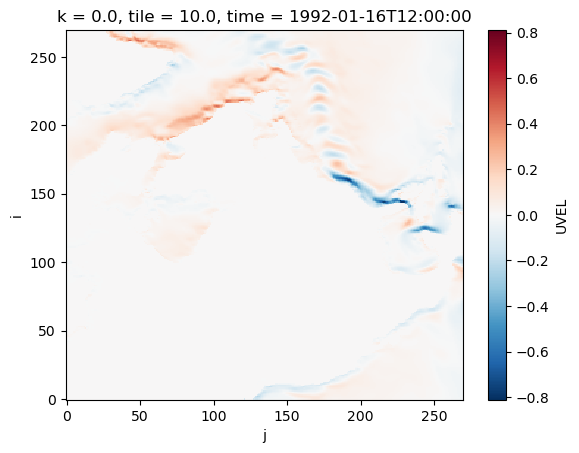

In [15]:

uv_model.isel(time=0,k=0,tile=10)['UVEL'].plot()

In [16]:
temp_gridded = xr.merge([model_gridded['THETA'],grid_davis.isel(tile=10).set_coords({'XC','YC'})])
temp_gridded['THETA'].isel(time=0,k=0).plot()
temp_gridded

NameError: name 'model_gridded' is not defined

<xarray.Dataset>
Dimensions:   (j: 270, i: 270)
Coordinates:
    tile      float64 10.0
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
    k         int64 0
    timestep  int64 dask.array<chunksize=(), meta=np.ndarray>
    time      datetime64[ns] 1992-01-16T12:00:00
    XC        (i, j) float32 ...
    YC        (i, j) float32 ...
Data variables: (12/13)
    THETA     (j, i) float32 dask.array<chunksize=(270, 270), meta=np.ndarray>
    UVEL      (j, i) float32 dask.array<chunksize=(270, 270), meta=np.ndarray>
    VVEL      (j, i) float32 dask.array<chunksize=(270, 270), meta=np.ndarray>
    DXC       (i, j) float32 ...
    DXG       (i, j) float32 ...
    DYC       (i, j) float32 ...
    ...        ...
    Depth     (i, j) float32 ...
    RAC       (i, j) float32 ...
    RAZ       (i, j) float32 ...
    XG        (i, j) float32 ...
    YG        (i, j) float32 ...
    hFacC     (i, j) float64 ...
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

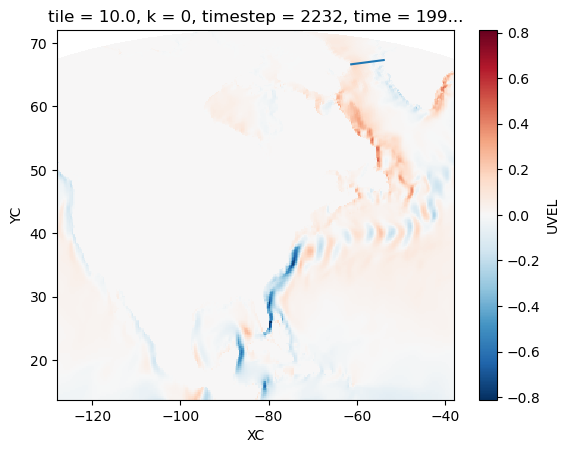

In [17]:
model_gridded = xr.merge([temp_model['THETA'].isel(tile=10),uv_model['UVEL'].rename({'i':'j1','j':'i1'}).rename({'j1':'j','i1':'i'}).isel(tile=10),uv_model['VVEL'].rename({'i':'j1','j':'i1'}).rename({'j1':'j','i1':'i'}).isel(tile=10),grid_davis.isel(tile=10).set_coords({'XC','YC'})])
model_gridded = model_gridded.set_coords({'XC','YC'})
model_gridded.isel(k=0,time=0)['UVEL'].plot(x='XC',y='YC')
plt.plot(lon_sampled*-1,lat_sampled)
#model_gridded
model_gridded.isel(time=0,k=0)#.rename({'i_g':'i'})

In [18]:
transect_lon = lon_sampled*-1
transect_lat = lat_sampled
lat_cut = model_gridded.where(np.logical_and(transect_lat.max()+.5>model_gridded.YC,transect_lat.min()-.5<model_gridded.YC))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.XC,transect_lon.min()-.5<lat_cut.XC))
tran_cut = lon_cut.dropna(how='all',dim='i').dropna(how='all',dim='j')
lon = tran_cut.XC
lat = tran_cut.YC
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])

In [19]:
for i in tqdm(range(0,len(tran_cut.time))):
    for j in range(0,len(tran_cut['k'])):
        tran_cut_time_k = tran_cut.isel(time=i,k=j)
        time = [np.array(tran_cut_time_k.time)]
        k_num = [np.array(grid_270['RC'])[j]]
        sampled_transect_u = griddata(points, np.array(tran_cut_time_k['UVEL']).T.ravel(), (transect_lon, transect_lat))
        sampled_transect_v = griddata(points, np.array(tran_cut_time_k['VVEL']).T.ravel(), (transect_lon, transect_lat))
        sampled_transect_u = np.reshape(sampled_transect_u, (1,1,70))
        sampled_transect_v = np.reshape(sampled_transect_v, (1,1,70))
        u_data = xr.DataArray(sampled_transect_u ,coords=[time,k_num,data.x],dims=['time','depth','x'],name='u')
        v_data = xr.DataArray(sampled_transect_v,coords=[time,k_num,data.x],dims=['time','depth','x'],name='v')
        u_data.to_netcdf(llc270_data+'davis-subsample/U/U_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')
        v_data.to_netcdf(llc270_data+'davis-subsample/V/V_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')

100%|███████████████████████████████████████| 255/255 [2:48:13<00:00, 39.58s/it]


In [9]:
model_u_files, model_u_filepath = tools.get_data_paths_from_binary(llc270_data,'davis-subsample/U',file_end='nc')
model_v_files, model_v_filepath = tools.get_data_paths_from_binary(llc270_data,'davis-subsample/V',file_end='nc')
uv_subsampled = xr.open_mfdataset(model_u_filepath+model_v_filepath)

In [8]:
st_obs_data = xr.open_dataset(to_hd+'Davis/model_and_observable_dataset.nc')
#data_full = xr.merge([st_obs_data,model_interped.rename({'u':'u_270','v':'v_270'})])

In [15]:
np.array(st_obs_data['salinity_270'][0])

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 7.67167251, 11.49244163, 15.50384675, ..., 32.9085507 ,
        32.57702055,  7.20766871],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
np.array(model_interped['u'].isel(time=0))

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.00344357, 0.00808462, 0.01309646, ..., 0.02140966, 0.01451222,
        0.00559185],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

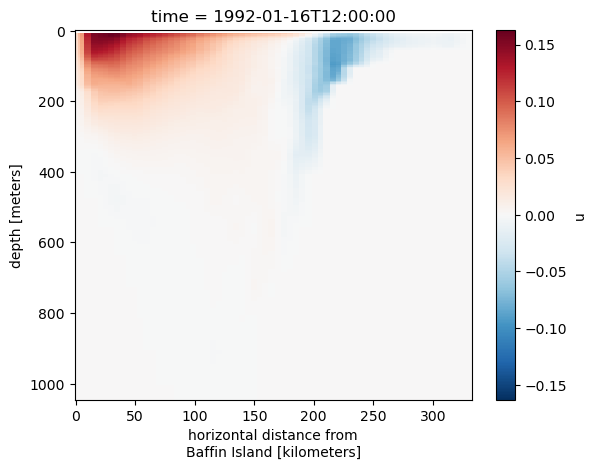

In [16]:
uv_subsampled['u'].isel(time=0).interp(depth=data.depth*-1).plot()
plt.gca().invert_yaxis()
#data['velocity'].isel(time=0).plot(y='depth')
#plt.gca().invert_yaxis()
model_interped = uv_subsampled.sel(time=slice('2004-10','2010-09')).interp(depth=data.depth*-1)


In [24]:
tran_cut_time_k = tran_cut.isel(time=58,k=0)
sampled_transect_u = griddata(points, np.array(tran_cut_time_k['UVEL']).T.ravel(), (transect_lon, transect_lat))
sampled_transect_u

array([ 0.0175808 ,  0.03675875,  0.05738947,  0.05837222,  0.07900294,
        0.14540598,  0.18376504,  0.2062561 ,  0.21275416,  0.22279693,
        0.22798994,  0.22581162,  0.22364611,  0.22423209,  0.22137957,
        0.21492124,  0.21149297,  0.20420833,  0.19420774,  0.18391859,
        0.17129936,  0.15460333,  0.13606657,  0.12568761,  0.09676431,
        0.07983228,  0.06259251,  0.05105254,  0.04281987,  0.03654869,
        0.03299439,  0.03170376,  0.03040498,  0.02908695,  0.02750788,
        0.02660028,  0.02405396,  0.02142012,  0.01781798,  0.01307848,
        0.00470291, -0.0051659 , -0.01686149, -0.03267468, -0.04389904,
       -0.05777567, -0.07316222, -0.07278551, -0.06936357, -0.06575391,
       -0.05778391, -0.04881938, -0.04151218, -0.03728222, -0.0347677 ,
       -0.03140164, -0.02852523, -0.02646153, -0.02674242, -0.02462385,
       -0.0232512 , -0.02201653, -0.01879422, -0.01720277, -0.0167078 ,
       -0.01804744, -0.01878371, -0.01301387, -0.00699239, -0.00

In [146]:
uv_subsampled.close()

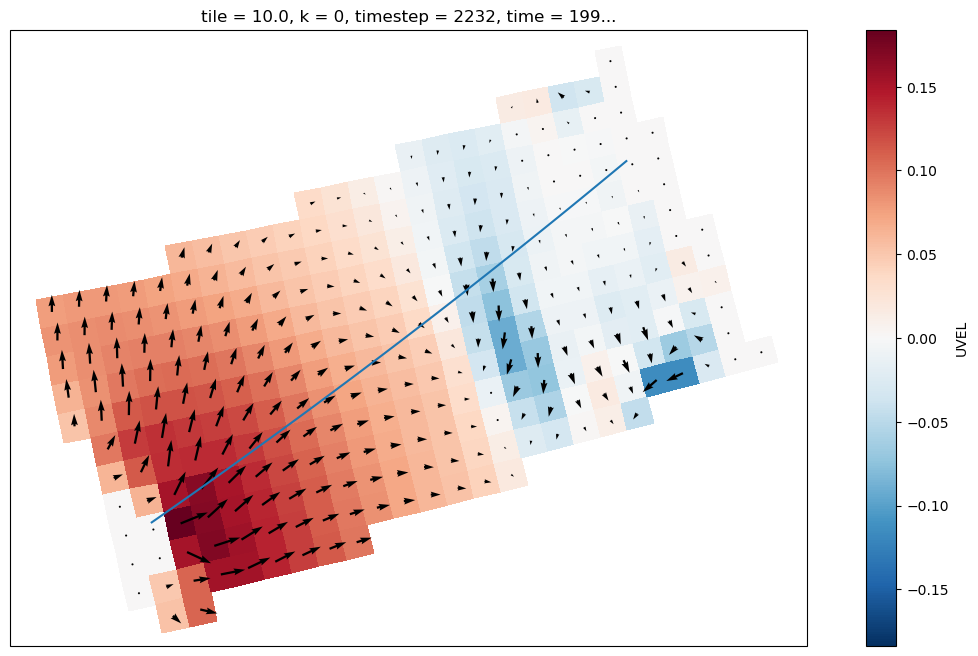

In [117]:
proj = ccrs.LambertConformal()
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=proj)
tran_cut['UVEL'].isel(time=0,k=0).plot(x='XC',y='YC',transform=ccrs.PlateCarree())
ax.quiver(np.asarray(tran_cut['XC']), np.asarray(tran_cut['YC']), np.asarray(tran_cut['UVEL'].isel(time=0,k=0)).T, np.asarray(tran_cut['VVEL'].isel(time=0,k=0)).T,scale=5,transform=ccrs.PlateCarree(), label = 'vectors' )
plt.plot(transect_lon,transect_lat,transform=ccrs.PlateCarree())
plt.savefig('./surface_flow.png')

In [100]:
np.shape(np.asarray(tran_cut['VVEL'].isel(time=0,k=0)).T)==np.shape(np.asarray(tran_cut['YC']))
np.shape(np.asarray(tran_cut['UVEL'].isel(time=0,k=0)).T)==np.shape(np.asarray(tran_cut['YC']))
np.shape(np.asarray(tran_cut['UVEL'].isel(time=0,k=0)))==np.shape(np.asarray(tran_cut['XC']))

False

In [26]:
transect_lon = lon_sampled*-1
transect_lat = lat_sampled
x_hat = np.diff(transect_lon)
y_hat = np.diff(transect_lat)
x_normalized = (x_hat / np.sqrt(x_hat ** 2 + y_hat ** 2))
y_normalized = (y_hat / np.sqrt(x_hat ** 2 + y_hat ** 2))

# find the unit vector perpendicular to the line
x_normal = y_normalized
y_normal = -x_normalized
y_normal = np.append(y_normal,y_normal.mean())
x_normal = np.append(x_normal,x_normal.mean())

deg_shift = np.arctan(y_hat/x_hat)
deg_shift = np.append(deg_shift,deg_shift.mean())
deg_shift = deg_shift*180/(2*np.pi)

In [27]:
deg_shift

array([2.5935886, 2.5911705, 2.675834 , 2.5911705, 2.5951445, 2.5940573,
       2.594061 , 2.5918572, 2.595259 , 2.5933037, 2.595259 , 2.5933037,
       2.5933924, 2.5935886, 2.5945702, 2.5933037, 2.595259 , 2.5933037,
       2.5944989, 2.5933037, 2.595259 , 2.5933037, 2.5937607, 2.5939553,
       2.595348 , 2.5933037, 2.5944118, 2.5933924, 2.5944118, 2.5933037,
       2.5944989, 2.5933037, 2.5944989, 2.595259 , 2.5930789, 2.594223 ,
       2.592572 , 2.5944989, 2.595259 , 2.593036 , 2.5941396, 2.5944989,
       2.5934367, 2.5947475, 2.5944989, 2.5939746, 2.5923498, 2.5944989,
       2.5944989, 2.5934367, 2.5962474, 2.592572 , 2.5944989, 2.5944989,
       2.593036 , 2.5955472, 2.5944989, 2.5924845, 2.5952272, 2.5929103,
       2.5944118, 2.5939953, 2.5943851, 2.5944118, 2.5937607, 2.5944118,
       2.5944989, 2.5937607, 2.5936744, 2.5951421], dtype=float32)

In [28]:
def rot(u,v,theta):
    """
Rotate a vector counter-clockwise OR rotate the coordinate system clockwise.

Usage:
ur,vr = rot(u,v,theta)

Input:
u,v - vector components (e.g. u = eastward velocity, v = northward velocity)
theta - rotation angle (degrees)

Output:
ur,vr - rotated vector components

Example:
rot(1,0,90) returns (0,1)
    """

    # Make sure inputs are numpy arrays
    if type(u) is list:
        u = np.array(u)
        v = np.array(v)

    w = u + 1j*v            # complex vector
    ang = theta*np.pi/180   # convert angle to radians
    wr = w*np.exp(1j*ang)  # complex vector rotation
    ur = np.real(wr)        # return u and v components
    vr = np.imag(wr)
    return ur,vr




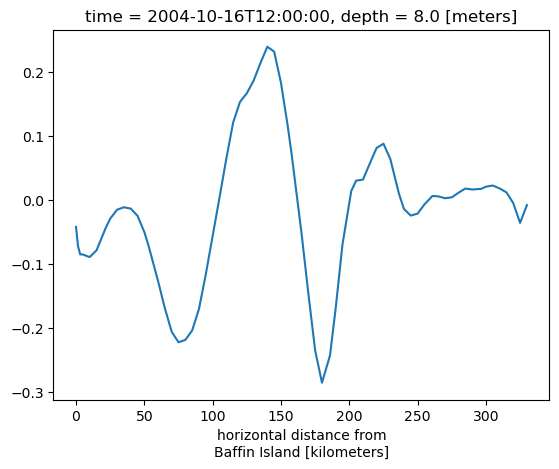

In [53]:
almost_complete=xr.open_dataset(to_hd+'/Davis/complete_davis_subsample_file.nc')
degree_full = np.full(np.shape(almost_complete['u_1080']),deg_shift)

ur_1080,vr_1080 = rot(almost_complete['u_1080'],almost_complete['v_1080'],degree_full)
vr_1080.isel(time=0,depth=depth_num).plot() #only car about vr which is the along strait direction


In [54]:
ur_270, vr_270 = rot(almost_complete['v_270'],almost_complete['u_270']*-1,degree_full)



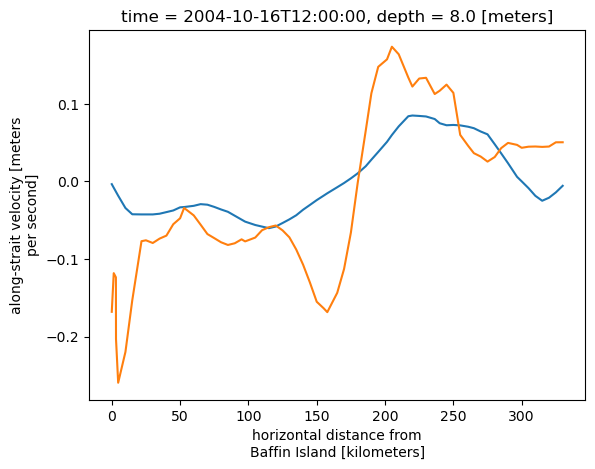

In [55]:
depth_num = 2
vr_270.isel(time=0,depth=depth_num).plot() #only car about vr which is the along strait direction
almost_complete['velocity'].isel(time=0,depth=depth_num).plot(label='observed')
plt.savefig('./velocity_compare.png')

In [56]:
almost_complete['velocity_270'] = vr_270
almost_complete['velocity_1080'] = vr_1080

array([[[-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        ...,
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421]],

       [[-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        ...,
        [-2.5935886, -2.5911705, -2.675834 , ..., -2.5937607,
         -2.5936744, -2.5951421],
        [-2.

In [96]:
correction = np.full(np.shape(model_interped['u']),y_normal)
velocity_270 = (model_interped['u']*correction+model_interped['v']*correction).rename('velocity_270')
velocity_270.coords['time']=np.array(st_obs_data.time)
almost_complete = xr.merge([st_obs_data,velocity_270])

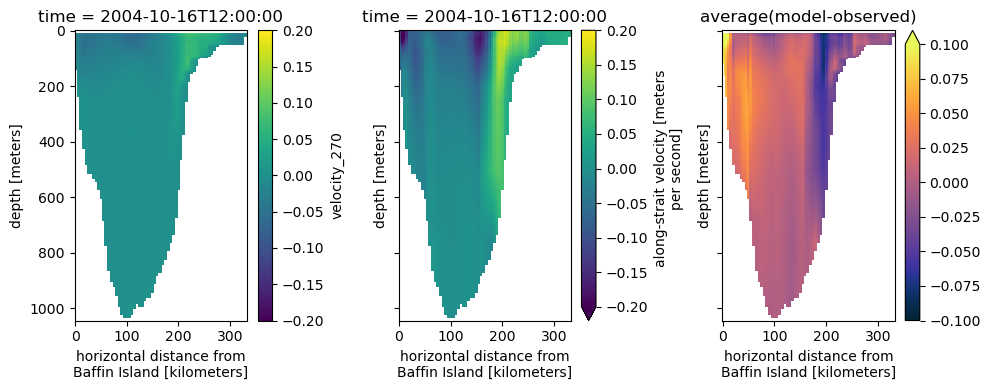

In [57]:
#dropped = almost_complete.dropna(how='all',dim='time')
fig,ax = plt.subplots(ncols=3, nrows=1,figsize=(10,4),sharey=True)
almost_complete['velocity_270'].isel(time=0).where(np.isfinite(almost_complete['velocity'].isel(time=0))).plot(ax=ax[0],vmin=-.2,vmax=.2)
plt.gca().invert_yaxis()
ax[0].set_ylim(almost_complete.depth[-1],almost_complete.depth[0])
almost_complete['velocity'].isel(time=0).plot(x='x',ax=ax[1],vmin=-.2,vmax=.2)

vel_diff = (almost_complete['velocity_270'] - almost_complete['velocity']).mean(dim='time')
vel_diff.plot(y='depth',vmin=-.1,vmax=.1, cmap=cm.cm.thermal,ax=ax[2])
ax[2].set_title('average(model-observed)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('./velocity_compare.png')

In [67]:
#calculate normal velocity to transect, along strait
# find unit vector in direction of line
x_hat = np.diff(transect_lon)
y_hat = np.diff(transect_lat)
x_normalized = (x_hat / np.sqrt(x_hat ** 2 + y_hat ** 2))
y_normalized = (y_hat / np.sqrt(x_hat ** 2 + y_hat ** 2))

# find the unit vector perpendicular to the line
x_normal = y_normalized
y_normal = -x_normalized

In [68]:
y_normal = np.append(y_normal,y_normal.mean())
x_normal = np.append(x_normal,x_normal.mean())

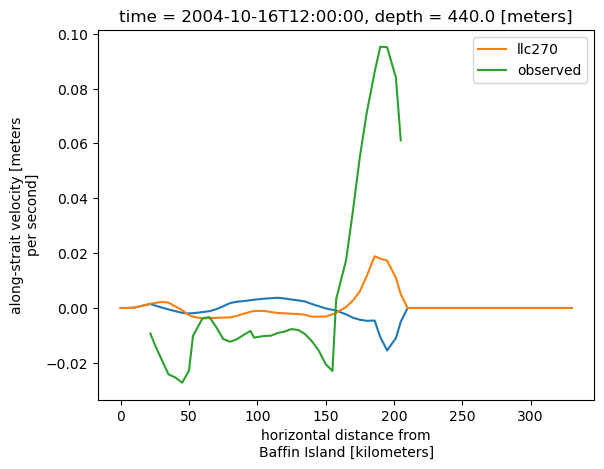

In [146]:
depth_num = 4
time_num = 0
velocity_along_270 = model_interped['u'].isel(time=time_num,depth=depth_num)*(y_normal)+model_interped['v'].isel(time=time_num,depth=depth_num)*(y_normal)
velocity_along_270_mod = model_interped['u'].isel(time=time_num,depth=depth_num)*(y_normal)+model_interped['v'].isel(time=time_num,depth=depth_num)*(-1*y_normal)
velocity_along_270_mod.plot()
velocity_along_270.plot(label='llc270')
st_obs_data['velocity'].isel(time=0,depth=depth_num).plot(label='observed')
plt.legend()
plt.savefig('./velocity_compare.png')

In [69]:
x_normal * x_normal + y_normal * y_normal

array([0.9999999 , 0.99999994, 1.        , 0.99999994, 1.        ,
       1.        , 0.99999994, 1.        , 0.9999999 , 0.9999999 ,
       0.9999999 , 0.9999999 , 1.        , 0.9999999 , 0.99999994,
       0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 ,
       0.9999999 , 0.9999999 , 1.        , 1.        , 1.0000001 ,
       0.9999999 , 1.        , 1.        , 1.        , 0.9999999 ,
       0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 , 0.99999994,
       1.0000001 , 0.99999994, 0.9999999 , 0.9999999 , 1.0000001 ,
       1.0000001 , 0.9999999 , 1.        , 1.        , 0.9999999 ,
       1.0000001 , 1.0000001 , 0.9999999 , 0.9999999 , 1.        ,
       0.99999994, 0.99999994, 0.9999999 , 0.9999999 , 1.0000001 ,
       1.0000001 , 0.9999999 , 1.        , 1.        , 0.99999994,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9999999 , 1.        , 1.0000001 , 0.9999998 ],
      dtype=float32)

In [71]:
#scalar = (u_var_grid[t, d, i] * x_normal + v_var_grid[t, d, i] * y_normal) / (
#        x_normal * x_normal + y_normal * y_normal)

scalar = model_interped['u'].isel(time=0,depth=depth_num)*(y_normal)+model_interped['v'].isel(time=0,depth=depth_num)*(y_normal)
u_normal = scalar * x_normal
v_normal = scalar * y_normal

# check whether the normal vector and normal velocity
# are in the same direction to determine the sign of the flux (on or off the shelf)
sign = np.sign(u_normal * x_normal + v_normal * y_normal)
magnitude = (u_normal ** 2 + v_normal ** 2) ** 0.5

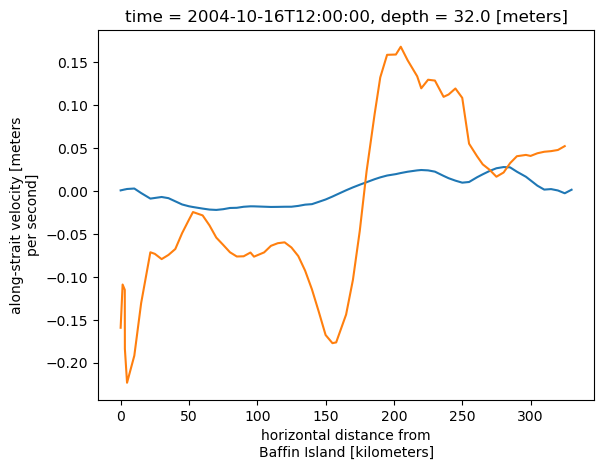

In [75]:
(sign*magnitude).plot(label='llc270')
st_obs_data['velocity'].isel(time=0,depth=depth_num).plot(label='observed')


In [123]:
llc1080_path = '/media/basil/Elements/data/L1_llc1080/'
var = 'vel_nc_files'
llc1080_files, llc1080_filepaths = tools.get_data_paths_from_binary(llc1080_path,var,file_end='nc')

In [124]:
llc1080_data = xr.open_mfdataset(llc1080_filepaths).set_coords({'longitude','latitude'})

In [125]:
llc1080_data

<xarray.Dataset>
Dimensions:     (iterations: 84, depths: 50, rows: 720, cols: 540)
Coordinates:
  * iterations  (iterations) float32 1.262e+06 1.271e+06 ... 1.981e+06 1.99e+06
    longitude   (iterations, rows, cols) float32 dask.array<chunksize=(1, 720, 540), meta=np.ndarray>
    latitude    (iterations, rows, cols) float32 dask.array<chunksize=(1, 720, 540), meta=np.ndarray>
  * depths      (depths) float32 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
Dimensions without coordinates: rows, cols
Data variables:
    time        (iterations) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    Uvel        (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 720, 540), meta=np.ndarray>
    Vvel        (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 720, 540), meta=np.ndarray>

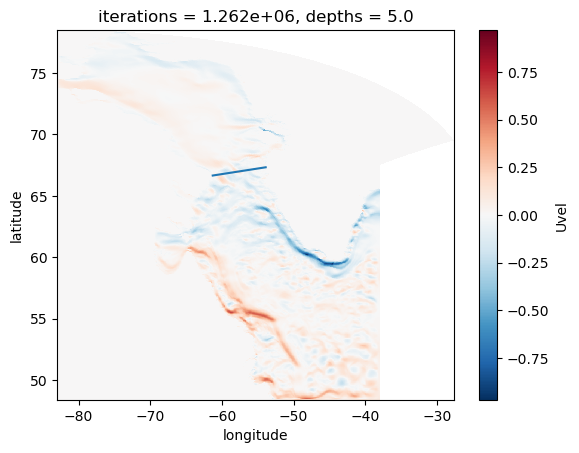

In [127]:
llc1080_data.isel(iterations=0,depths=0)['Uvel'].plot(x='longitude',y='latitude')
#model_gridded['THETA'].isel(k=0,time=0).plot(x='XC',y='YC')
plt.plot(lon_sampled*-1,lat_sampled)
plt.xlim()
plt.ylim()
plt.savefig('./transect_.png')

In [133]:
transect_lon = lon_sampled*-1
transect_lat = lat_sampled
lat_cut = llc1080_data.where(np.logical_and(transect_lat.max()+.5>llc1080_data.latitude,transect_lat.min()-.5<llc1080_data.latitude))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.longitude,transect_lon.min()-.5<lat_cut.longitude))
tran_cut = lon_cut.dropna(how='all',dim='rows').dropna(how='all',dim='cols')
lon = tran_cut.longitude
lat = tran_cut.latitude
Lon, Lat = lon,lat
#points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
#sampled_transect_depth_mult = griddata(points, np.array(tran_cut['temperature']).ravel(), (transect_lon, transect_lat))
tran_cut

<xarray.Dataset>
Dimensions:     (iterations: 84, rows: 66, cols: 104, depths: 50)
Coordinates:
  * iterations  (iterations) float32 1.262e+06 1.271e+06 ... 1.981e+06 1.99e+06
    longitude   (iterations, rows, cols) float32 dask.array<chunksize=(1, 66, 104), meta=np.ndarray>
    latitude    (iterations, rows, cols) float32 dask.array<chunksize=(1, 66, 104), meta=np.ndarray>
  * depths      (depths) float32 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
Dimensions without coordinates: rows, cols
Data variables:
    time        (iterations, rows, cols) float32 dask.array<chunksize=(1, 66, 104), meta=np.ndarray>
    Uvel        (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 66, 104), meta=np.ndarray>
    Vvel        (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 66, 104), meta=np.ndarray>

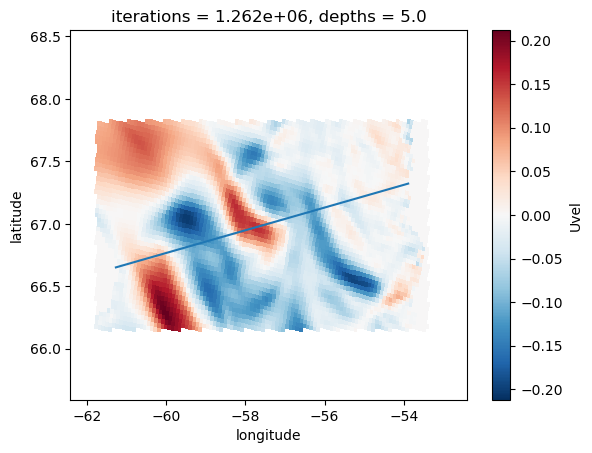

In [134]:
tran_cut['Uvel'].isel(iterations=0,depths=0).plot(x='longitude',y='latitude')
plt.plot(transect_lon,transect_lat)
plt.savefig('./transect.png')

In [136]:
i=1
j=1
lon = tran_cut.isel(iterations=0).longitude
lat = tran_cut.isel(iterations=0).latitude
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
tran_cut_time_k = tran_cut.isel(iterations=i,depths=j)
year = llc1080_files[i].split('.')[1][0:4]
month = llc1080_files[i].split('.')[1][4:6]
day = 15
sampled_transect_u = griddata(points, np.array(tran_cut_time_k['Uvel']).ravel(), (transect_lon, transect_lat))
sampled_transect_u

array([ 0.        ,  0.        , -0.00108188, -0.00134373, -0.009969  ,
       -0.02133586, -0.02390855, -0.03068469, -0.03581521, -0.04360833,
       -0.05260858, -0.0611651 , -0.07135692, -0.08292811, -0.08983108,
       -0.10815943, -0.1182442 , -0.12479124, -0.12603482, -0.12308017,
       -0.11662764, -0.10733715, -0.09631337, -0.09009861, -0.06832841,
       -0.05263101, -0.03898155, -0.02776758, -0.01667931, -0.00397709,
        0.00808946,  0.02931152,  0.05441426,  0.04573049,  0.02555179,
        0.01353961, -0.0064284 , -0.02503901, -0.05108155, -0.07923638,
       -0.10783951, -0.13195521, -0.15671667, -0.14420034, -0.12461884,
       -0.09285453, -0.08348478, -0.09090346, -0.09236634, -0.07579791,
       -0.0410354 , -0.03816932, -0.03802069, -0.0493291 , -0.06617787,
       -0.05760957, -0.04128077, -0.01946446, -0.00134856,  0.0102831 ,
        0.01179726,  0.01054672,  0.00827654,  0.00857488,  0.02032898,
        0.02794425,  0.02188417,  0.00831919, -0.00021918,  0.00

In [137]:
lon = tran_cut.isel(iterations=0).longitude
lat = tran_cut.isel(iterations=0).latitude
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
#model_data_subsampled = np.zeros((2,len(tran_cut.time),len(tran_cut['k']),70))
#model_data_subsampled[0,:,:,:] = 'SALT'
#model_data_subsampled[1,:,:,:] = 'THETA'
shape = (50)
# file_path = llc270_data +'grid/RC.data'
# RC = np.fromfile(file_path,'>f4')
# RC = np.reshape(RC, shape)
for i in tqdm(range(0,len(tran_cut.iterations))):
    for j in range(0,len(tran_cut['depths'])):
        tran_cut_time_k = tran_cut.isel(iterations=i,depths=j)
        year = llc1080_files[i].split('.')[1][0:4]
        month = llc1080_files[i].split('.')[1][4:6]
        day = 15
        time = [datetime(int(year),int(month),int(day))]        
        k_num = [np.array(tran_cut['depths'])[j]]
        sampled_transect_u = griddata(points, np.array(tran_cut_time_k['Uvel']).ravel(), (transect_lon, transect_lat))
        sampled_transect_v = griddata(points, np.array(tran_cut_time_k['Vvel']).ravel(), (transect_lon, transect_lat))
        sampled_transect_u = np.reshape(sampled_transect_u, (1,1,70))
        sampled_transect_v = np.reshape(sampled_transect_v, (1,1,70))
        u_data = xr.DataArray(sampled_transect_u, coords=[time,k_num,data.x],dims=['time','depth','x'],name='u_1080')
        v_data = xr.DataArray(sampled_transect_v, coords=[time,k_num,data.x],dims=['time','depth','x'],name='v_1080')
        u_data.to_netcdf(llc1080_path+'davis-subsample/U/UVEL_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')
        v_data.to_netcdf(llc1080_path+'davis-subsample/V/VVEL_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')

100%|███████████████████████████████████████████| 84/84 [43:15<00:00, 30.90s/it]


In [147]:
llc1080_sub_filesu, llc1080_sub_filepathsu = tools.get_data_paths_from_binary(llc1080_path,'davis-subsample/U',file_end='nc')
llc1080_sub_filesv, llc1080_sub_filepathsv = tools.get_data_paths_from_binary(llc1080_path,'davis-subsample/V',file_end='nc')

llc1080_subsampled = xr.open_mfdataset(llc1080_sub_filepathsu+llc1080_sub_filepathsv)

In [169]:
uv_llc1080 = llc1080_subsampled.sel(time=slice('2004-10','2010-09')).interp(depth=data.depth)
uv_llc1080.coords['time'] = almost_complete['time']

np.shape(uv_llc1080['u_1080'])

(72, 161, 70)

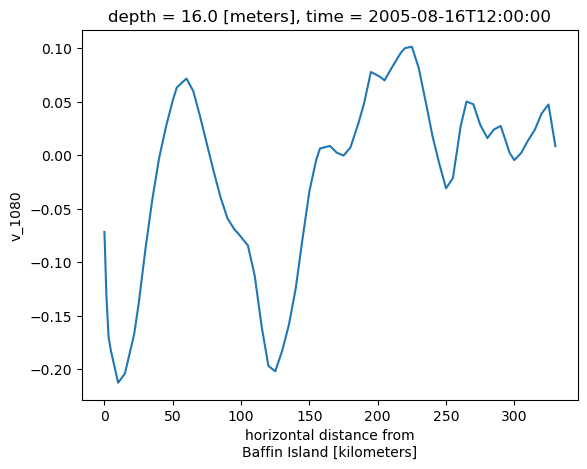

In [170]:
uv_llc1080['v_1080'].isel(time=10,depth=4).plot()

In [251]:
ycorrection = np.full(np.shape(uv_llc1080['u_1080']),y_normal)
xcorrection = np.full(np.shape(uv_llc1080['u_1080']),x_normal)

velocity_1080 = (uv_llc1080['u_1080']*ycorrection+uv_llc1080['v_1080']*ycorrection).rename('velocity_1080')

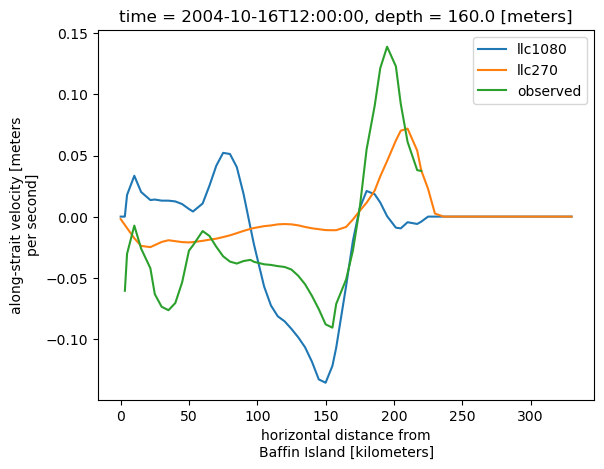

In [253]:
velocity_1080.isel(time=0,depth=40).plot(label='llc1080')
velocity_along_270 = model_interped['u_270'].isel(time=0,depth=40)*(y_normal)+model_interped['v_270'].isel(time=0,depth=40)*(y_normal)
velocity_along_270.plot(label='llc270')
st_obs_data['velocity'].isel(time=0,depth=40).plot(label='observed')
plt.legend()
plt.savefig('./velocity_compare_hmm.png')

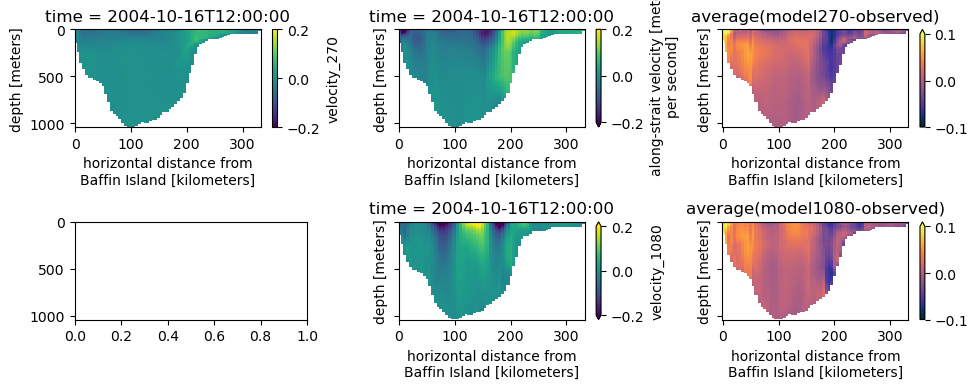

In [58]:
velocity_1080 = almost_complete['velocity_1080']

fig,ax = plt.subplots(ncols=3, nrows=2,figsize=(10,4),sharey=True)
almost_complete['velocity_270'].isel(time=0).where(np.isfinite(almost_complete['velocity'].isel(time=0))).plot(ax=ax[0,0],vmin=-.2,vmax=.2)
plt.gca().invert_yaxis()
almost_complete['velocity'].isel(time=0).plot(x='x',ax=ax[0,1],vmin=-.2,vmax=.2)
velocity_1080.isel(time=0).where(np.isfinite(almost_complete['velocity'].isel(time=0))).plot(ax=ax[1,1],vmin=-.2,vmax=.2,x='x')

vel_diff = (almost_complete['velocity_270'] - almost_complete['velocity']).mean(dim='time')
vel_diff.plot(y='depth',vmin=-.1,vmax=.1, cmap=cm.cm.thermal,ax=ax[0,2])
ax[0,2].set_title('average(model270-observed)')
vel_diff_1080 = (velocity_1080 - almost_complete['velocity']).mean(dim='time')
vel_diff_1080.plot(y='depth',vmin=-.1,vmax=.1, cmap=cm.cm.thermal,ax=ax[1,2])
ax[1,2].set_title('average(model1080-observed)')
plt.gca().invert_yaxis()
plt.tight_layout()
ax[0,0].set_ylim(almost_complete.depth[-1],almost_complete.depth[0])
#ax[1,2].set_ylabel('')

plt.savefig('./velocity_compare.png')


In [60]:
almost_complete.to_netcdf('./complete_davis_subsample_file.nc')

In [205]:
np.array(st_obs_data['velocity'].isel(time=0,depth=40))

array([        nan,         nan,         nan, -0.06065863, -0.03047783,
       -0.00735742, -0.02621716, -0.04225068, -0.06345196, -0.07376555,
       -0.07658107, -0.07071221, -0.05376679, -0.02780638, -0.02353286,
       -0.01181849, -0.01582872, -0.02468394, -0.03246275, -0.03682477,
       -0.03839636, -0.0363332 , -0.03539293, -0.03698241, -0.03901431,
       -0.03953507, -0.04051844, -0.04119723, -0.04331678, -0.04842267,
       -0.05540675, -0.0648572 , -0.07568095, -0.08815592, -0.09085699,
       -0.07149051, -0.0514726 , -0.02769382,  0.00734777,  0.05500191,
        0.09053711,  0.12147407,  0.1390175 ,  0.1229534 ,  0.09226912,
        0.06111314,  0.03804627,  0.03734763,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [249]:
uv_llc1080
#model_interped = model_interped.rename({'u':'u_270','v':'v_270'})
model_interped.coords['time'] = np.array(almost_complete.time)
uv_llc1080.coords['time']= np.array(almost_complete.time)
subsampled_model_velocities = xr.merge([uv_llc1080,model_interped])
subsampled_model_velocities

<xarray.Dataset>
Dimensions:  (x: 70, time: 72, depth: 161)
Coordinates:
  * x        (x) float32 0.0 1.439 3.027 3.097 4.684 ... 315.0 320.0 325.0 330.0
  * depth    (depth) float32 0.0 4.0 8.0 12.0 ... 1.02e+03 1.03e+03 1.04e+03
  * time     (time) datetime64[ns] 2004-10-16T12:00:00 ... 2010-09-16T12:00:00
Data variables:
    u_1080   (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    v_1080   (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    u_270    (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    v_270    (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>

In [255]:
uv_added = xr.merge([almost_complete,subsampled_model_velocities,velocity_1080])

In [257]:
uv_added.to_netcdf(to_hd+'Davis/complete_davis_subsample_file.nc')